In [72]:
import os
import numpy as np
import random
import torch
import time
import optuna
from DQN.train_dqn import train_dqn
from pathlib import Path
%matplotlib inline

%load_ext autoreload
%autoreload 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cuda


In [73]:
seed = 1234
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [74]:
from envs.GraphEnv.impnode import ImpnodeEnv
from DQN import DQN_agent_modular_reg

results\latest\cuda_0.001_100000_500_0.99_64_5000_500_1.0_0.05_1000_0.0001_4_2_32_64_1_3_(30, 50)_dw_nd_barabasi_albert'

In [75]:
# variables for training the agent
def objective(trial):
    
    dropout1 = trial.suggest_categorical('dropout1', [0.05])
    dropout2 = trial.suggest_categorical('dropout2', [0])
    l2_reg = trial.suggest_categorical('l2_reg', [0.0001])
    num_train_eps = 10000 #10000 number training episodes to run
    num_mem_fill_eps = 500#1000 number of episodes to run to initialize the memory
    discount = 0.99 # gamma used for computing return
    batch_size = 64 # number of transitions to sample from replay buffer for each learn step
    mem_capacity = 50000  # 500000 size of the memory buffer
    update_frequency = 500 #1000 number of interactions after which the target buffer is updated
    eps_max = 1.0 # initial epsilon value
    eps_min = 0.05 # final epsilon value
    eps_step = 1000 #1000 amount by which epsilon is decayed at each episode
    lr = 0.001 # learning rate for the network
    alpha = 0.001 # weighing factor for graph reconstruction loss
    
    gnn_depth=4
    state_size=2
    hidden_size1=32
    hidden_size2=64
    action_size=1
    n_step=3
    
    num_nodes = (30, 50)
    anc = 'dw_nd'
    g_type = 'barabasi_albert'
    val_data_path = 'data/synthetic/degree_cost/30-50'
    val_data_path = Path.cwd()/val_data_path
    
    model_name = 'model'
    results_base_path_train = "results/regularized/hyp_search_ba_reg_changed_order/{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}".format(
                           device, alpha, num_train_eps, num_mem_fill_eps, discount, batch_size, mem_capacity, update_frequency, eps_max, eps_min, eps_step, lr, gnn_depth, state_size, hidden_size1, hidden_size2, action_size, n_step, num_nodes, anc, g_type, dropout1, dropout2, l2_reg)

    if not os.path.exists(results_base_path_train):
        os.makedirs(results_base_path_train)
    else:
        timestamp = time.strftime("%Y%m%d%H%M%S")
        new_directory = f"{results_base_path_train}_{timestamp}"
        os.makedirs(new_directory)
        results_base_path_train = new_directory
        print(f"Directory already exists. Created a new one: {new_directory}")

    
    env_train = ImpnodeEnv(anc=anc, 
                       g_type=g_type, 
                       num_nodes=num_nodes, 
                       mode='train'
                       )
    # create the dqn_agent
    dqn_agent_train = DQN_agent_modular_reg.DQNAgent(device,
                                                 alpha=alpha,
                                                 gnn_depth=gnn_depth,
                                                 state_size=state_size,
                                                 hidden_size1=hidden_size1,
                                                 hidden_size2=hidden_size2,
                                                 action_size=action_size,
                                                 discount=discount,
                                                 eps_max=eps_max,
                                                 eps_min=eps_min,
                                                 eps_step=eps_step,
                                                 memory_capacity=mem_capacity,
                                                 lr=lr,
                                                 mode='train',
                                                 dropout1=dropout1,
                                                dropout2=dropout2,
                                                 l2_reg=l2_reg)

    
    
    val_score = train_dqn(env_train, dqn_agent_train, results_base_path_train, num_train_eps, num_mem_fill_eps, n_step, batch_size, update_frequency, val_data_path, model_name)
    return val_score


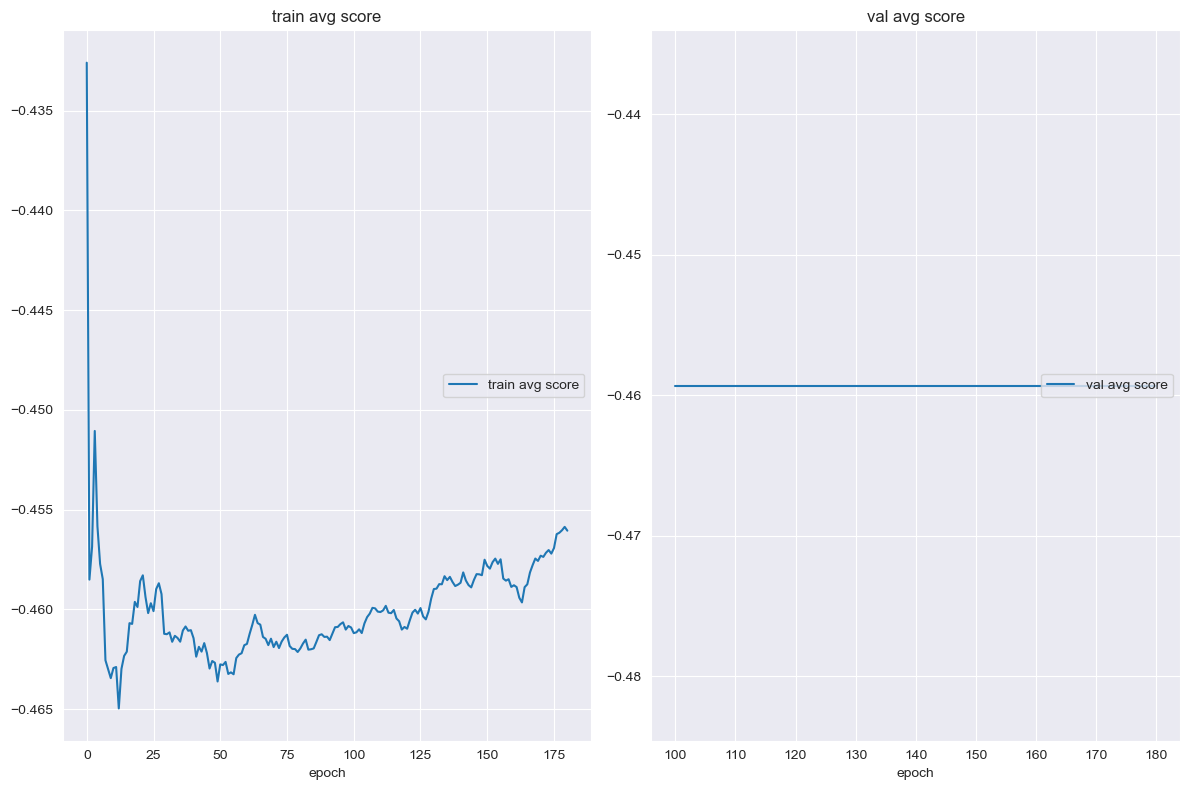

train avg score
	train avg score  	 (min:   -0.465, max:   -0.433, cur:   -0.456)
val avg score
	val avg score    	 (min:   -0.459, max:   -0.459, cur:   -0.459)


[W 2024-04-19 16:17:10,997] Trial 1 failed with parameters: {'dropout1': 0.05, 'dropout2': 0, 'l2_reg': 0.0001} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\rituja.pardhi\.conda\envs\impnode-gpu\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\rituja.pardhi\AppData\Local\Temp\1\ipykernel_12648\607182937.py", line 72, in objective
    val_score = train_dqn(env_train, dqn_agent_train, results_base_path_train, num_train_eps, num_mem_fill_eps, n_step, batch_size, update_frequency, val_data_path, model_name)
  File "C:\rituja_git\ma-rituja-pardhi\DQN\train_dqn.py", line 67, in train_dqn
    agent.learn(batch_size)
  File "C:\rituja_git\ma-rituja-pardhi\DQN\DQN_agent_modular_reg.py", line 185, in learn
    batch_next_states = self.preprocess_graphs(next_states).to(self.device)
  File "C:\rituja_git\ma-rituja-pardhi\DQN\DQN_agent_modular_reg.py", line 210, in pre

KeyboardInterrupt: 

In [76]:
study = optuna.create_study(direction='maximize', storage='sqlite:///example.db', study_name='only l2 and dropout1')
study.optimize(objective, n_trials=20)

In [ ]:
study.best_params

In [ ]:
import matplotlib.pyplot as plt
import plotly

In [ ]:
optuna.visualization.plot_optimization_history(study)


In [3]:
import pathlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
files = [str(f)+'\info.csv' for f in pathlib.Path('{}/results/hyp_search_ba_train_2'.format(pathlib.Path.cwd())).iterdir() if f.is_dir()]

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\rituja_git\\ma-rituja-pardhi\\results\\hyp_search_ba_train_2\\cuda_0.001_100000_100_0.99_64_50000_500_1.0_0.05_1000_0.001_4_2_32_64_1_3_(30, 50)_dw_nd_barabasi-albert\\info.csv'

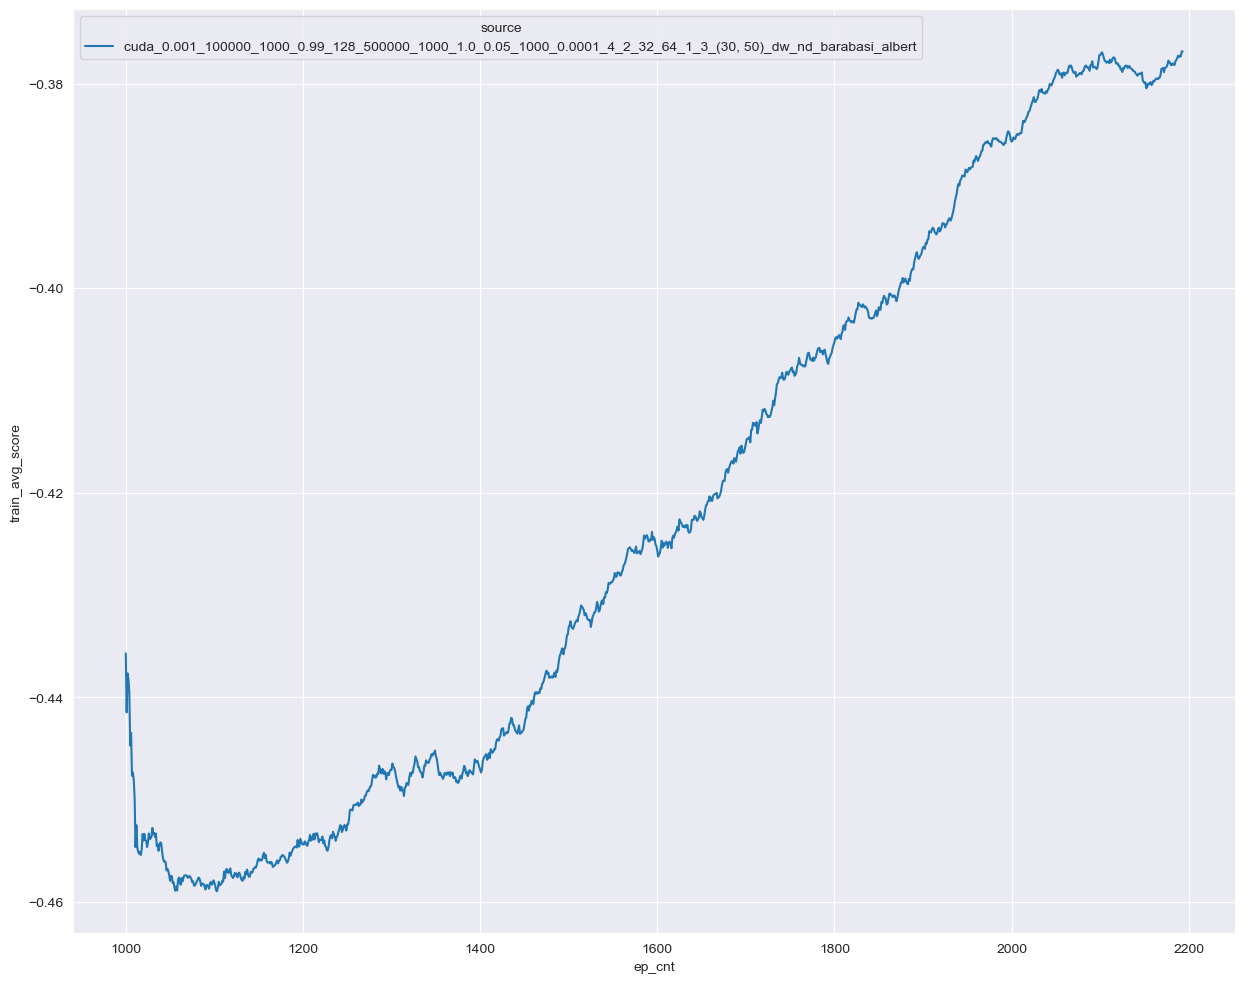

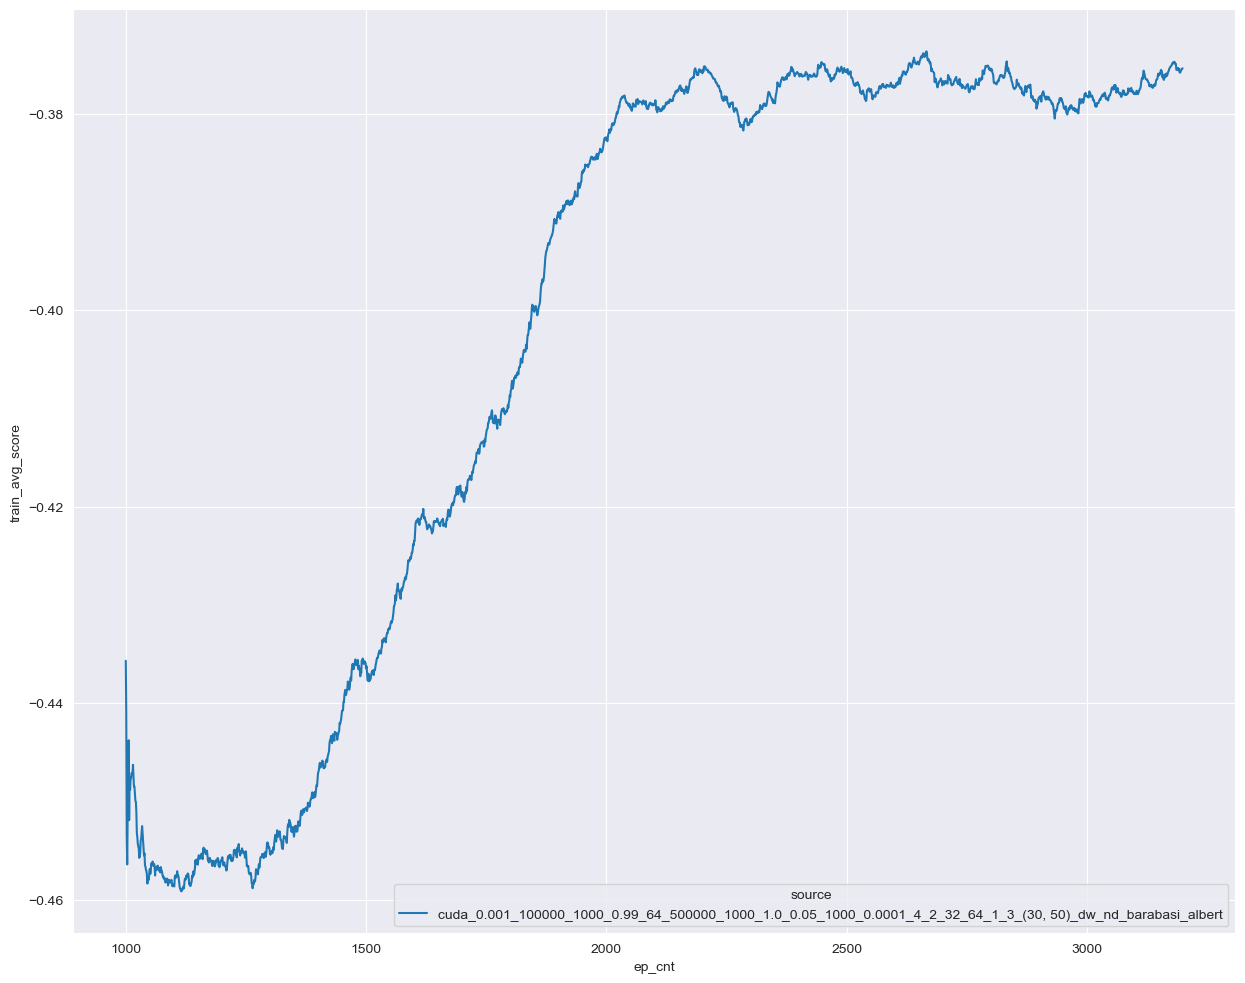

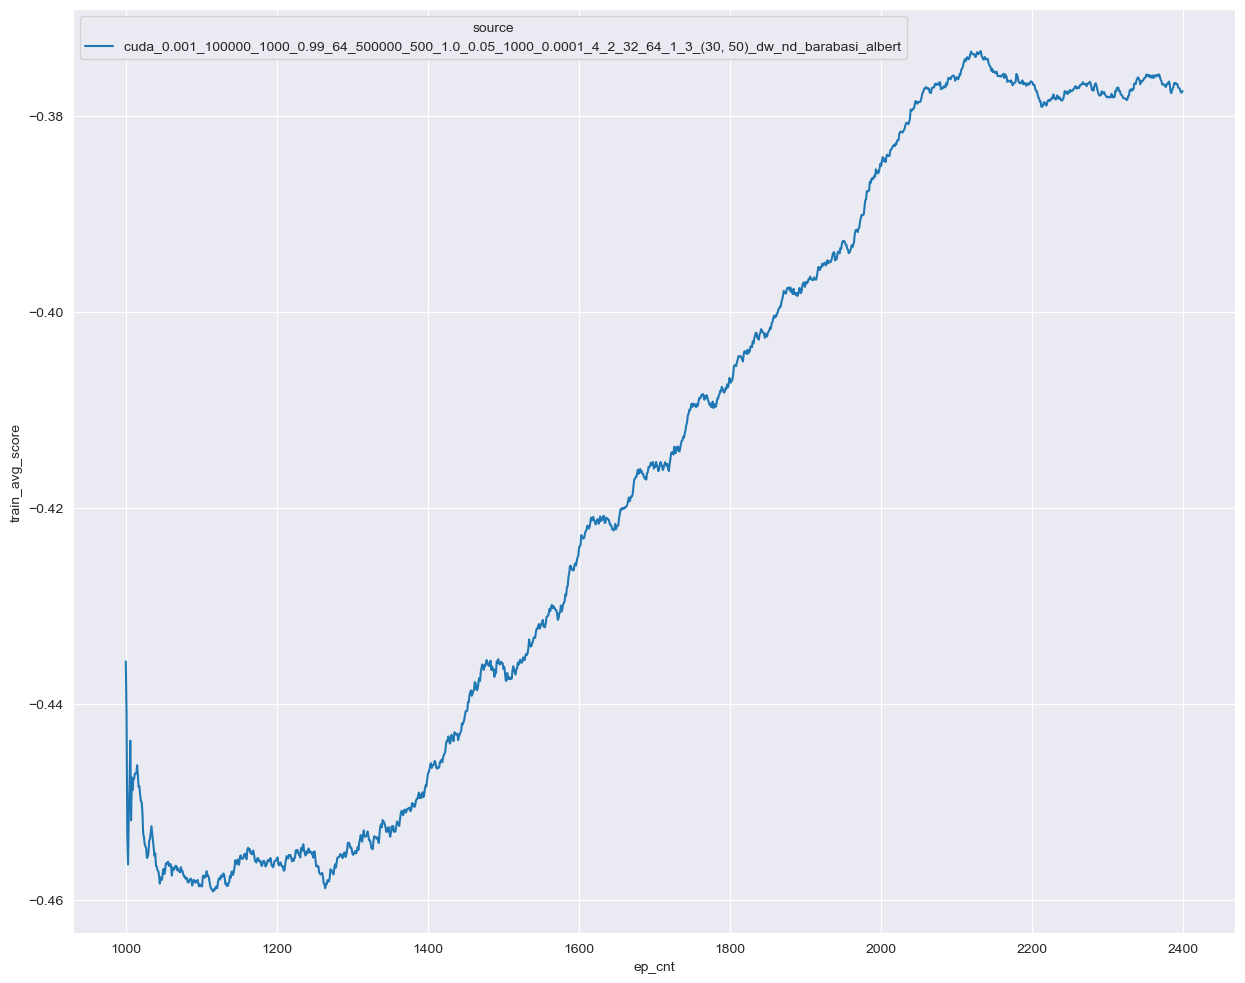

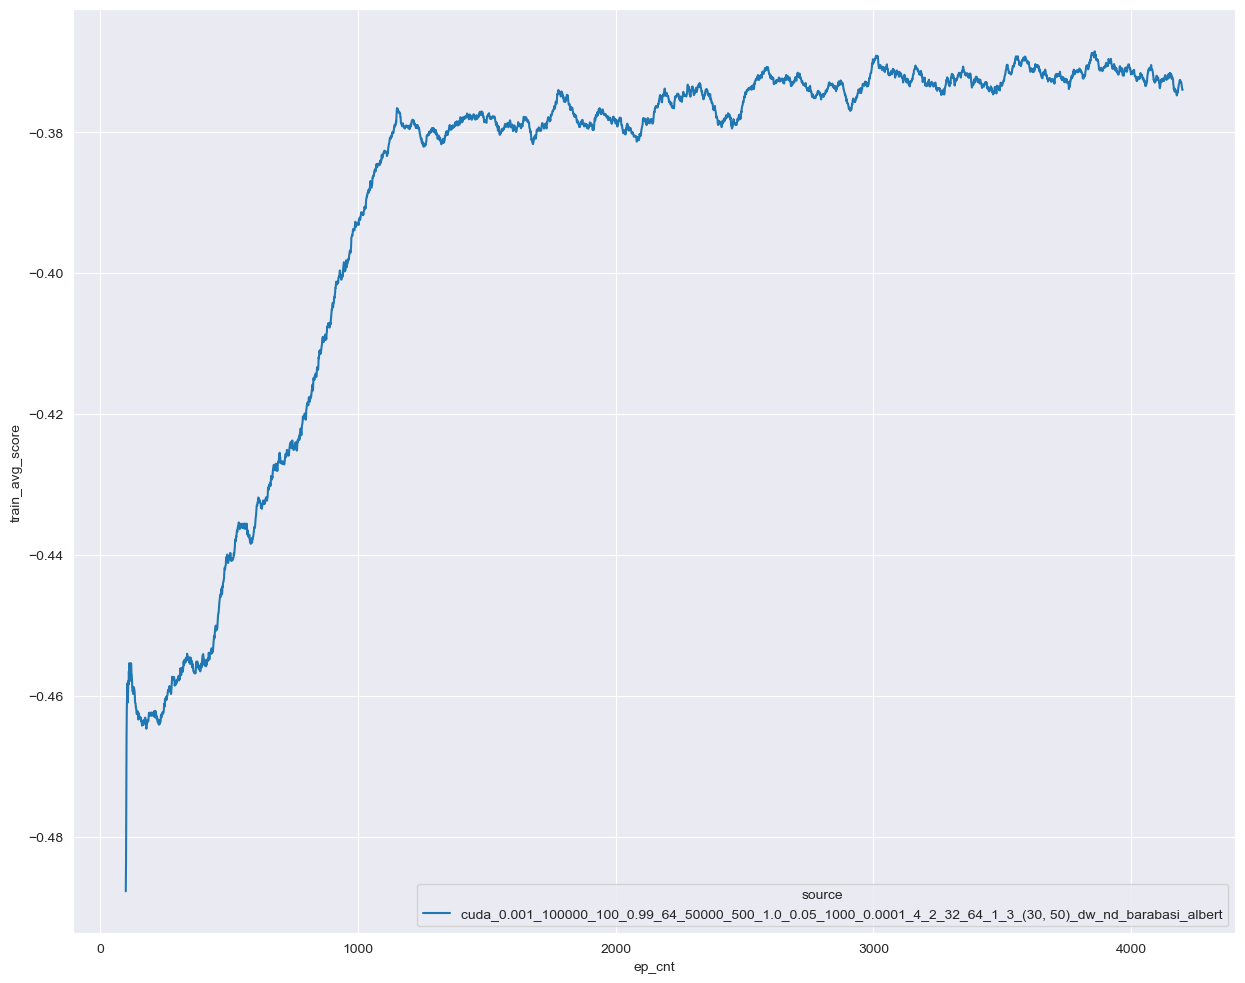

In [4]:
dataframes = []
for file in files:
    df = pd.read_csv(file) 
    
    df['source'] = file.split('\\')[-2]
    dataframes.append(df)
    plt.figure(figsize=(15,12))
    ax = sns.lineplot(df, y='train_avg_score', x='ep_cnt', hue='source')
    #sns.move_legend(ax, "upper right")

In [ ]:
df_all = pd.concat(dataframes)
df_all

In [ ]:
plt.figure(figsize=(15,12))
ax = sns.lineplot(df_all, y='val_avg_score', x='ep_cnt', hue='source', palette=sns.color_palette("tab20", 24))
sns.move_legend(ax, "upper right")